In [1]:
#This dataset is composed of flight details from 2015, it contains details on scheduled departure and arrival times, 
#as well as actual arrival and departure times, delay times for both arrival and departure, and a breakdown of times 
#for specific delay reasons.

#The data considers a delay significant enough to track if the arrival was delayed more than 15 minutes, 
#so this is the basis I use for considering a flight 'delayed.'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
%matplotlib inline
output_notebook()

#https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe

Loading BokehJS ...

In [2]:
#pull our data in
flights_clean=pd.read_csv('flights_clean.csv', encoding='utf-8', index_col=0, dtype={'ORIGIN_AIRPORT':str, 'DESTINATION_AIRPORT':str, 'SCHEDULED_DEPARTURE':int, 'DEPARTURE_TIME':str, 'WHEELS_OFF':str, 'WHEELS_ON':str, 'SCHEDULED_ARRIVAL':str, 'ARRIVAL_TIME':str, 'DIVERTED':bool, 'CANCELLED':bool})
flights_clean["YEAR_MONTH_DAY"] = pd.to_datetime(flights_clean["YEAR_MONTH_DAY"])
flights_clean.head()

/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354,-11.0,...,0408,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,0002,-8.0,...,0741,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,0018,-2.0,...,0811,5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,0015,-5.0,...,0756,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,0024,-1.0,...,0259,-21.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


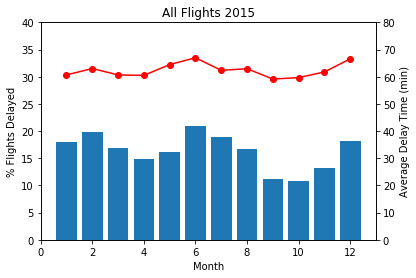

In [27]:
#Question 1: How often are flights delayed, and does time of year play a factor?

delay_all_ave = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean() 
delay_all = flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() * 100

x = delay_all.index
y1 = delay_all.values
y2 = delay_all_ave.values


fig, ax1=plt.subplots()
ax2=ax1.twinx()

ax1.bar(x, y1)
ax2.plot(x, y2, marker = 'o', color='r')

ax1.set_title('All Flights 2015')
ax1.set_ylim(0,40)
ax2.set_ylim(0,80)
ax1.set_xlabel('Month')
ax1.set_ylabel('% Flights Delayed')
ax2.set_ylabel('Average Delay Time (min)')

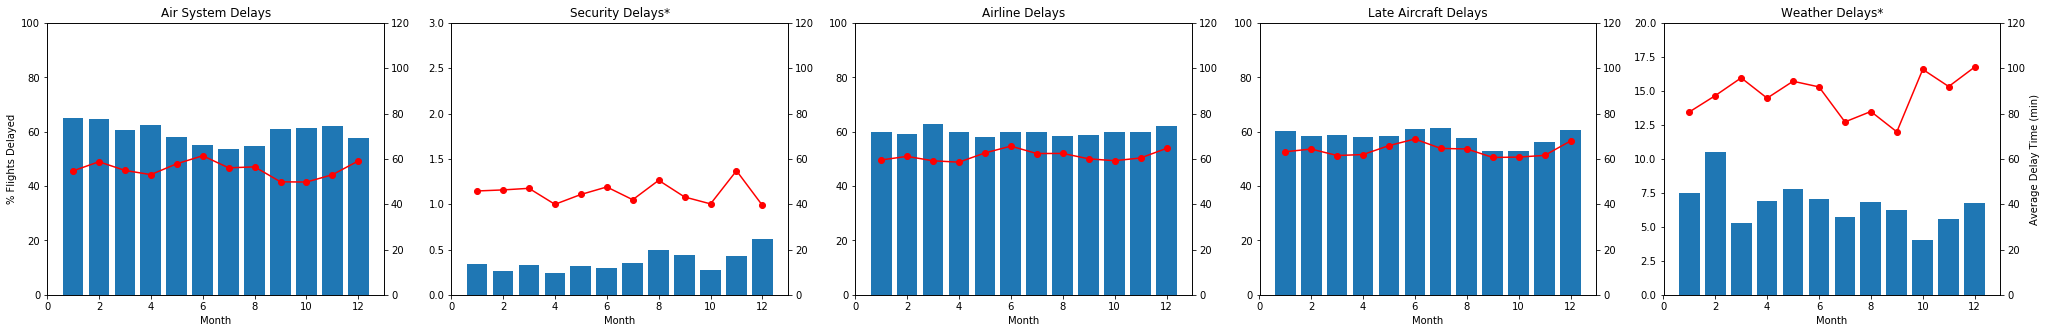

In [41]:
#Question 2: What is the breakdown in delay types? Are certain things responsible for more delays?
#note, there could be multiple delay types for one flight so adding each graph will lead to greater than 1.
#graphs with * in the title indicate the y axis limit is less than 100 for the % of delayed flights

plt.figure(figsize=((5*7),5))
x=[1,2,3,4,5,6,7,8,9,10,11,12]
a1 = plt.subplot(151)

delayed_ave = flights_clean[flights_clean.AIR_SYSTEM_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.AIR_SYSTEM_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y1 = delayed.values
y2 = delayed_ave.values

ax1=a1.twinx()

a1.bar(x, y1)
ax1.plot(x, y2, marker = 'o', color='r')

a1.set_title('Air System Delays')
a1.set_ylim(0,100)
ax1.set_ylim(0,120)
a1.set_xlabel('Month')
a1.set_ylabel('% Flights Delayed')

a2 = plt.subplot(152)

delayed_ave = flights_clean[flights_clean.SECURITY_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.SECURITY_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y3 = delayed.values
y4 = delayed_ave.values

ax2=a2.twinx()

a2.bar(x, y3)
ax2.plot(x, y4, marker = 'o', color='r')

a2.set_title('Security Delays*')
a2.set_ylim(0,3)
ax2.set_ylim(0,120)
a2.set_xlabel('Month')


a3 = plt.subplot(153)

delayed_ave = flights_clean[flights_clean.AIRLINE_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.AIRLINE_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y5 = delayed.values
y6 = delayed_ave.values

ax3=a3.twinx()

a3.bar(x, y5)
ax3.plot(x, y6, marker = 'o', color='r')

a3.set_title('Airline Delays')
a3.set_ylim(0,100)
ax3.set_ylim(0,120)
a3.set_xlabel('Month')


a4 = plt.subplot(154)
#a4.plot(x,y)
delayed_ave = flights_clean[flights_clean.LATE_AIRCRAFT_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.LATE_AIRCRAFT_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y7 = delayed.values
y8 = delayed_ave.values

ax4=a4.twinx()

a4.bar(x, y7)
ax4.plot(x, y8, marker = 'o', color='r')

a4.set_title('Late Aircraft Delays')
a4.set_ylim(0,100)
ax4.set_ylim(0,120)
a4.set_xlabel('Month')


a5 = plt.subplot(155)
delayed_ave = flights_clean[flights_clean.WEATHER_DELAY > 0].ARRIVAL_DELAY.groupby(flights_clean.YEAR_MONTH_DAY.dt.month).mean()
delayed = flights_clean[flights_clean.WEATHER_DELAY > 0].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size() / flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)].groupby(flights_clean.YEAR_MONTH_DAY.dt.month).size()*100


y9 = delayed.values
y10 = delayed_ave.values

ax5=a5.twinx()

a5.bar(x, y9)
ax5.plot(x, y10, marker = 'o', color='r')

a5.set_title('Weather Delays*')
a5.set_ylim(0,20)
ax5.set_ylim(0,120)
a5.set_xlabel('Month')
ax5.set_ylabel('Average Delay Time (min)')


In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Category20_14
from bokeh.io import push_notebook
from ipywidgets import interact

data = flights_clean[(flights_clean.ORIGIN_AIRPORT == 'ACL') & (flights_clean.DESTINATION_AIRPORT == 'SEA')]
source = ColumnDataSource( dict(
 x = data.YEAR_MONTH_DAY,
 y = data.DEPARTURE_DELAY,
 airline = data.AIRLINE
))


def update(origin, dest, departuretime):
    data = flights_clean[(flights_clean.ORIGIN_AIRPORT == origin) & (flights_clean.DESTINATION_AIRPORT == dest) & (flights_clean.SCHEDULED_DEPARTURE < departuretime)]
    new_data = dict(
     x = data.YEAR_MONTH_DAY,
     y = data.DEPARTURE_DELAY,
     airline = data.AIRLINE
    )
    source.data = new_data
    push_notebook()


color_mapper = CategoricalColorMapper(
    factors = list(flights_clean.AIRLINE.unique()),
    palette = Category20_14)

p = figure(width=700, height=500, x_axis_type="datetime", y_range=[-20,1000])
p.circle(x='x', y='y', size=7, color={'field':'airline', 'transform':color_mapper}, alpha=0.5, source = source, legend='airline')
p.legend.location = [0,10]
p.right.append(p.legend[0])

interact(update, origin = list(flights_clean.ORIGIN_AIRPORT.unique()), dest = list(flights_clean.DESTINATION_AIRPORT.unique()), departuretime = (0,2355,5))
show(p, notebook_handle=True)